# Decision Tree Exercises

### Exercises

Use the titanic data:

- 1. What is your baseline prediction? 
- 2. What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 
- 3. When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [59]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import acquire

In [60]:
df = acquire.get_titanic_data()

In [61]:
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [62]:
df.value_counts()

Unnamed: 0  passenger_id  survived  pclass  sex     age   sibsp  parch  fare      embarked  class   deck  embark_town  alone
1           1             1         1       female  38.0  1      0      71.2833   C         First   C     Cherbourg    0        1
571         571           1         1       female  53.0  2      0      51.4792   S         First   C     Southampton  0        1
577         577           1         1       female  39.0  1      0      55.9000   S         First   E     Southampton  0        1
581         581           1         1       female  39.0  1      1      110.8833  C         First   C     Cherbourg    0        1
583         583           0         1       male    36.0  0      0      40.1250   C         First   A     Cherbourg    1        1
                                                                                                                               ..
325         325           1         1       female  36.0  0      0      135.6333  C         Fir

In [63]:
# Which label appears most frequently in our dataset?
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [64]:
# Baseline prediction will be the most prevalent which is 0 for survived (in other words, did not survive)
df['baseline'] = 0
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,baseline
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,0
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1,0
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1,0
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1,0


In [65]:
# Baseline accuracy:

baseline_accuracy = (df.survived == df.baseline).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 61.62%


In [66]:
#Replace string values in columns to prepare data for model

df.replace({'sex':{'male':1, 'female':0}}, inplace=True)  #male is 1, female is 0

df.replace({'class':{'First':1, 'Second':2, 'Third':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3

df.replace({'deck':{'A':1, 'B':2, 'C':3}}, inplace=True) #NaN is 0, A is 1, B is 2, C is 3

df.replace({'embark_town':{'Cherbourg':1, 'Southampton':2, 'Queenstown':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3

df.replace({'embarked':{'C':1, 'S':2, 'Q':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3






In [67]:
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,baseline
0,0,0,0,3,1,22.0,1,0,7.2500,2.0,3,NaN,2.0,0,0
1,1,1,1,1,0,38.0,1,0,71.2833,1.0,1,3,1.0,0,0
2,2,2,1,3,0,26.0,0,0,7.9250,2.0,3,NaN,2.0,1,0
3,3,3,1,1,0,35.0,1,0,53.1000,2.0,1,3,2.0,0,0
4,4,4,0,3,1,35.0,0,0,8.0500,2.0,3,NaN,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,1,27.0,0,0,13.0000,2.0,2,NaN,2.0,1,0
887,887,887,1,1,0,19.0,0,0,30.0000,2.0,1,2,2.0,1,0
888,888,888,0,3,0,NaN,1,2,23.4500,2.0,3,NaN,2.0,0,0
889,889,889,1,1,1,26.0,0,0,30.0000,1.0,1,3,1.0,1,0


In [68]:
#drop Unnamed column
df = df.drop(columns='Unnamed: 0')

In [69]:
# drop rows where embarked/embark town are null values
df = df[~df.embark_town.isnull()]

In [70]:
# drop rows where age is null values
df = df[~df.age.isnull()]

#Or we can impute using the median age because it looks like there's nothing no age folks are way different
#df.age = df.age.fillna(value=df.age.median())
#print(df.age.median())

In [71]:
# drop the deck column
df = df.drop(columns='deck')

In [72]:
# encode embarked using dummy columns
titanic_dummies = pd.get_dummies(df.embark_town, drop_first=True)

In [73]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,baseline
0,0,0,3,1,22.0,1,0,7.2500,2.0,3,2.0,0,0
1,1,1,1,0,38.0,1,0,71.2833,1.0,1,1.0,0,0
2,2,1,3,0,26.0,0,0,7.9250,2.0,3,2.0,1,0
3,3,1,1,0,35.0,1,0,53.1000,2.0,1,2.0,0,0
4,4,0,3,1,35.0,0,0,8.0500,2.0,3,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,0,3,0,39.0,0,5,29.1250,3.0,3,3.0,0,0
886,886,0,2,1,27.0,0,0,13.0000,2.0,2,2.0,1,0
887,887,1,1,0,19.0,0,0,30.0000,2.0,1,2.0,1,0
889,889,1,1,1,26.0,0,0,30.0000,1.0,1,1.0,1,0


In [74]:
#How many nulls are in our dataset?
df.isna().sum()

passenger_id    0
survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
embark_town     0
alone           0
baseline        0
dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [76]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [77]:
train.shape

(398, 13)

In [78]:
X_train

,passenger_id,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,baseline
450,450,2,1,36.0,1,2,27.7500,2.0,2,2.0,0,0
543,543,2,1,32.0,1,0,26.0000,2.0,2,2.0,0,0
157,157,3,1,30.0,0,0,8.0500,2.0,3,2.0,1,0
462,462,1,1,47.0,0,0,38.5000,2.0,1,2.0,1,0
397,397,2,1,46.0,0,0,26.0000,2.0,2,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
820,820,1,0,52.0,1,1,93.5000,2.0,1,2.0,0,0
673,673,2,1,31.0,0,0,13.0000,2.0,2,2.0,1,0
310,310,1,0,24.0,0,0,83.1583,1.0,1,1.0,1,0
72,72,2,1,21.0,0,0,73.5000,2.0,2,2.0,1,0


In [ ]:
# The mode is a great baseline
baseline = y_train.mode()

#
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print("Baseline accuracy: {round(baseline_accuracy, 2)}")

In [ ]:
#Train the model

#Create the Decision Tree object with desired hyper-parameters.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
#Fit the random forest algorithm to the training data.

# model.fit(X, y)

clf = clf.fit(X_train, y_train)

In [ ]:
#Graphviz: Visualize the Decision Tree

import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

In [ ]:
#Make Predictions on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

In [ ]:
#Estimate the probability using the training data

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

In [ ]:
#Evaluate the Model

#Compute Accuracy

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
#Create a confusion matrix

confusion_matrix(y_train, y_pred)

In [ ]:
y_train.value_counts()

In [ ]:
#Add labels

import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

In [ ]:
#Print classification report

print(classification_report(y_train, y_pred))

In [ ]:
#Evaluate the Model with our Validate dataset

#Compute the accuracy of the model when run on the validate data

print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

In [ ]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

In [ ]:
#Train the model with a max_depth of 2 to compare values

#Create the Decision Tree object with desired hyper-parameters.

clf = DecisionTreeClassifier(max_depth=2, random_state=123)

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

In [ ]:
y_pred = clf.predict(X_train)
y_pred[0:5]

In [ ]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

In [ ]:
y_train.value_counts()

In [ ]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

In [ ]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

In [ ]:
#Train the model with a max_depth of 4 to compare values

#Create the Decision Tree object with desired hyper-parameters.

clf = DecisionTreeClassifier(max_depth=4, random_state=123)

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

In [ ]:
y_pred = clf.predict(X_train)
y_pred[0:5]

In [ ]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

In [ ]:

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
confusion_matrix(y_train, y_pred)

In [ ]:
y_train.value_counts()

In [ ]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
#print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
#     .format(clf.score(X_validate, y_validate)))()

In [ ]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

# Random Forest Exercises

#### Continue working in your model file with titanic data to do the following:

- Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [79]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import acquire

# read Titanic data using acquire.py
df = acquire.get_titanic_data()



df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [80]:
#Clean up columns
df.replace({'sex':{'male':1, 'female':0}}, inplace=True)  #male is 1, female is 0
df = df.set_index("passenger_id")
df = df.drop(columns=["Unnamed: 0", "embarked"])
df

,survived,pclass,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
passenger_id,,,,,,,,,,,
0,0,3,1,22.0,1,0,7.2500,Third,NaN,Southampton,0
1,1,1,0,38.0,1,0,71.2833,First,C,Cherbourg,0
2,1,3,0,26.0,0,0,7.9250,Third,NaN,Southampton,1
3,1,1,0,35.0,1,0,53.1000,First,C,Southampton,0
4,0,3,1,35.0,0,0,8.0500,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,Second,NaN,Southampton,1
887,1,1,0,19.0,0,0,30.0000,First,B,Southampton,1
888,0,3,0,NaN,1,2,23.4500,Third,NaN,Southampton,0


In [81]:
# Drop deck because there are far too many nulls
df = df.drop(columns=["deck"])
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
passenger_id,,,,,,,,,,
0,0,3,1,22.0,1,0,7.2500,Third,Southampton,0
1,1,1,0,38.0,1,0,71.2833,First,Cherbourg,0
2,1,3,0,26.0,0,0,7.9250,Third,Southampton,1
3,1,1,0,35.0,1,0,53.1000,First,Southampton,0
4,0,3,1,35.0,0,0,8.0500,Third,Southampton,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,Second,Southampton,1
887,1,1,0,19.0,0,0,30.0000,First,Southampton,1
888,0,3,0,NaN,1,2,23.4500,Third,Southampton,0


In [82]:
# Let's fill embark_town with the most common observation
embark_town_fill = df.embark_town.mode()

df.embark_town = df.embark_town.fillna(value=embark_town_fill)
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
passenger_id,,,,,,,,,,
0,0,3,1,22.0,1,0,7.2500,Third,Southampton,0
1,1,1,0,38.0,1,0,71.2833,First,Cherbourg,0
2,1,3,0,26.0,0,0,7.9250,Third,Southampton,1
3,1,1,0,35.0,1,0,53.1000,First,Southampton,0
4,0,3,1,35.0,0,0,8.0500,Third,Southampton,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,Second,Southampton,1
887,1,1,0,19.0,0,0,30.0000,First,Southampton,1
888,0,3,0,NaN,1,2,23.4500,Third,Southampton,0


In [83]:
#Impute using the median age to fill nulls
df.age = df.age.fillna(value=df.age.median())

In [84]:
#Replace string values in the class column to be integers

df.replace({'class':{'First':1, 'Second':2, 'Third':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3

In [85]:
# Time to encode the encodeable!
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

# Drop the original columns we encoded
df = df.drop(columns=["sex", "embark_town"])

# Stitch the df and the dummy_df together again
df = pd.concat([df, dummy_df], axis=1)
df.head()

,survived,pclass,age,sibsp,parch,fare,class,alone,sex,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,,
0,0,3,22.0,1,0,7.2500,3,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,3,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,3,1,1,0,1


In [86]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [87]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [88]:
# Create the Random Forest object with desired hyper-parameters.

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [89]:
#Fit the random forest algorithm to the training data.

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [90]:
#RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [91]:
# Evaluate importance, or weight, of each feature.

print(rf.feature_importances_)

[0.06399206 0.22104757 0.04127792 0.0313418  0.22828761 0.05104334
 0.01795887 0.3055752  0.01244705 0.02702857]


In [92]:
# Make Predictions
y_pred = rf.predict(X_train)

In [93]:
# Estimate Probability

y_pred_proba = rf.predict_proba(X_train)

In [94]:
# Evaluate Model

#Compute the Accuracy

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [95]:
# Create a confusion matrix

print(confusion_matrix(y_train, y_pred))

[[307   0]
 [ 15 176]]


In [96]:
#Create a classificaiton report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       307
           1       1.00      0.92      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



In [97]:
#Validate Model

#Evaluate on Out-of-Sample data

print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))


Accuracy of random forest classifier on validate set: 0.80


In [98]:
#  Increasing your min_samples_leaf and decreasing max_depth to modify model

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [99]:
#Fit the random forest algorithm to the training data.

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=123)

In [100]:
# Evaluate importance, or weight, of each feature.

print(rf.feature_importances_)

[0.10058108 0.10470061 0.04607788 0.02557309 0.14834192 0.07814658
 0.01853994 0.43921091 0.01418503 0.02464297]


In [101]:
# Make Predictions
y_pred = rf.predict(X_train)

In [102]:
# Estimate Probability

y_pred_proba = rf.predict_proba(X_train)

In [103]:
# Evaluate Model

#Compute the Accuracy

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.87


In [104]:
#Create a classificaiton report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       307
           1       0.92      0.72      0.81       191

    accuracy                           0.87       498
   macro avg       0.88      0.84      0.86       498
weighted avg       0.88      0.87      0.87       498



In [105]:
#Validate Model

#Evaluate on Out-of-Sample data

print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))



Accuracy of random forest classifier on validate set: 0.80


In [106]:
#  Increasing your min_samples_leaf and decreasing max_depth to modify model

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [107]:
#Fit the random forest algorithm to the training data.

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [108]:
# Evaluate importance, or weight, of each feature.

print(rf.feature_importances_)

[0.13226625 0.07003681 0.02483363 0.01636397 0.1379396  0.10851371
 0.01854238 0.45506737 0.01975866 0.01667763]


In [109]:
# Make Predictions
y_pred = rf.predict(X_train)

In [110]:
# Estimate Probability

y_pred_proba = rf.predict_proba(X_train)

In [111]:
# Evaluate Model

#Compute the Accuracy

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.84


In [112]:
#Create a classification report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       307
           1       0.93      0.62      0.75       191

    accuracy                           0.84       498
   macro avg       0.87      0.80      0.81       498
weighted avg       0.85      0.84      0.83       498



In [113]:
#Validate Model

#Evaluate on Out-of-Sample data

print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))




Accuracy of random forest classifier on validate set: 0.80


In [114]:
#Increasing min_samples_per_leaf, decreasing max_depth

# Let's get loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.923695,0.808411,0.115284
1,3,17,0.901606,0.803738,0.097868
2,4,16,0.889558,0.803738,0.085820
3,5,15,0.883534,0.803738,0.079796
4,6,14,0.881526,0.803738,0.077788
5,7,13,0.869478,0.794393,0.075085
6,8,12,0.871486,0.803738,0.067748
7,9,11,0.861446,0.803738,0.057707
8,10,10,0.857430,0.794393,0.063037
9,11,9,0.849398,0.794393,0.055005


In [115]:
#What if we increase both min_samples_per_leaf and max_depth¶

# Let's get loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.807229,0.771028,0.036201
1,3,3,0.837349,0.799065,0.038284
2,4,4,0.855422,0.808411,0.047010
3,5,5,0.865462,0.803738,0.061724
4,6,6,0.877510,0.808411,0.069099
5,7,7,0.875502,0.799065,0.076437
6,8,8,0.871486,0.803738,0.067748
7,9,9,0.861446,0.799065,0.062380
8,10,10,0.857430,0.794393,0.063037
9,11,11,0.849398,0.794393,0.055005


<AxesSubplot:xlabel='max_depth', ylabel='difference'>

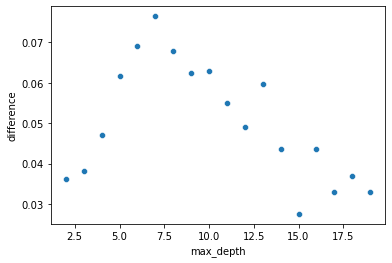

In [116]:
sns.scatterplot(x="max_depth", y="difference", data=df)

In [117]:
#What about a fixed depth and increasing min_samples_leaf

# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 50

for i in range(2, max_depth):
    # Make the model
    depth = 10
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,10,0.923695,0.827103,0.096592
1,3,10,0.901606,0.813084,0.088522
2,4,10,0.891566,0.803738,0.087828
3,5,10,0.883534,0.808411,0.075123
4,6,10,0.879518,0.808411,0.071107
5,7,10,0.867470,0.794393,0.073077
6,8,10,0.867470,0.803738,0.063732
7,9,10,0.861446,0.803738,0.057707
8,10,10,0.857430,0.794393,0.063037
9,11,10,0.849398,0.794393,0.055005


# KNN Lesson Exercises

#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [163]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sklearn.preprocessing

import acquire

# read Titanic data using acquire.py
df = acquire.get_titanic_data()




df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


#### Create the KNN Object

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)

In [119]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#### Fit the model to the training data.

In [120]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Make Predictions


In [121]:
y_pred = knn.predict(X_train)

#### Estimate the probability using the training data.

In [122]:
y_pred_proba = knn.predict_proba(X_train)

#### Evaluate Model & Compute the Accuracy

In [123]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.78


In [124]:
#### Create a confusion matrix

In [125]:
print(confusion_matrix(y_train, y_pred))

[[253  54]
 [ 54 137]]


In [157]:
pd.crosstab(y_pred, y_train)

survived,0,1
row_0,,
0,270,102
1,37,89


#### Create a classificaiton report

In [126]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       307
           1       0.72      0.72      0.72       191

    accuracy                           0.78       498
   macro avg       0.77      0.77      0.77       498
weighted avg       0.78      0.78      0.78       498



In [160]:
report = classification_report(y_train, y_pred, output_dict=True)

pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.725806,0.706349,0.720884,0.716078,0.718344
recall,0.879479,0.465969,0.720884,0.672724,0.720884
f1-score,0.795287,0.561514,0.720884,0.678401,0.705627
support,307.000000,191.000000,0.720884,498.000000,498.000000


Evaluate on Out-of-Sample data

Compute the accuracy of the model when run on the validate dataset.

#### Evaluate on Out-of-Sample data

- Compute the accuracy of the model when run on the validate dataset.

In [127]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.70


#### Visualize the Model

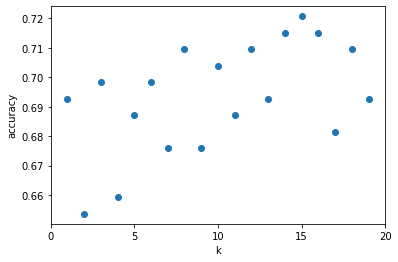

In [128]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

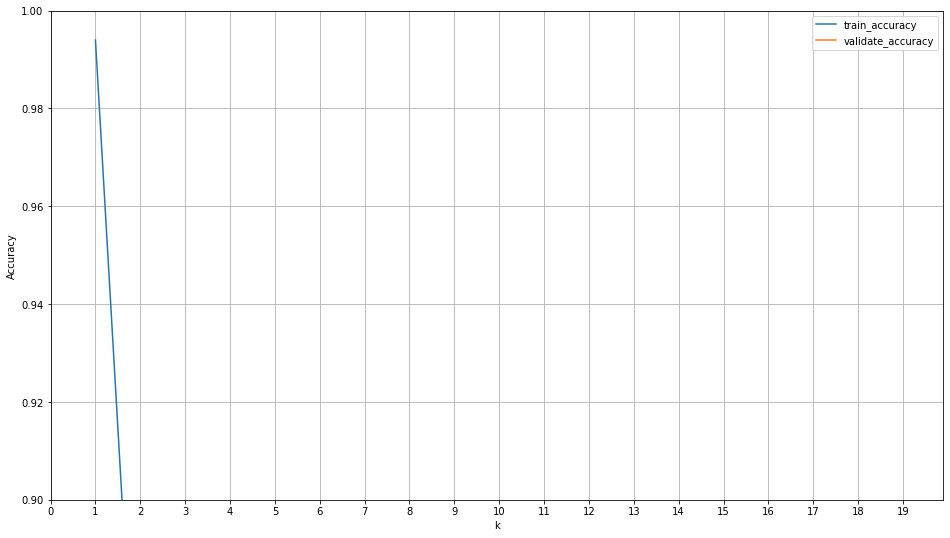

In [129]:
metrics = []

# loop through different values of k
for k in range(1, 20):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,20,1))
plt.grid()

#### Setting K to 10

In [137]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [138]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [132]:
y_pred = knn.predict(X_train)

In [133]:
y_pred_proba = knn.predict_proba(X_train)

In [134]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.75


In [135]:
print(confusion_matrix(y_train, y_pred))

[[276  31]
 [ 92  99]]


In [161]:
pd.crosstab(y_pred, y_train)

survived,0,1
row_0,,
0,270,102
1,37,89


In [136]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       307
           1       0.76      0.52      0.62       191

    accuracy                           0.75       498
   macro avg       0.76      0.71      0.72       498
weighted avg       0.75      0.75      0.74       498



In [139]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.71


#### Setting K to 20

In [149]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [150]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [151]:
y_pred = knn.predict(X_train)

In [152]:
y_pred_proba = knn.predict_proba(X_train)

In [153]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.72


In [154]:
print(confusion_matrix(y_train, y_pred))

[[270  37]
 [102  89]]


In [162]:
pd.crosstab(y_pred, y_train)

survived,0,1
row_0,,
0,270,102
1,37,89


In [155]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       307
           1       0.71      0.47      0.56       191

    accuracy                           0.72       498
   macro avg       0.72      0.67      0.68       498
weighted avg       0.72      0.72      0.71       498



In [156]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.72


In [ ]:
# In order of best accuracy, Random forest, decision tree and then KNN 

# Logistic Regression Exercises

### Exercises

In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Do your work for these exercises in either a notebook or a python script named model within your classification-exercises repository. Add, commit, and push your work.

Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

Try out other combinations of features and models.

Use you best 3 models to predict and evaluate on your validate sample.

Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [174]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

In [176]:
# read Titanic data using acquire.py
df = acquire.get_titanic_data()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [177]:
# Prepare the Titanic data 
prepare.prep_titanic(df)

(     Unnamed: 0  passenger_id  survived  pclass     sex        age  sibsp  \
 583         583           583         0       1    male  36.000000      0   
 337         337           337         1       1  female  41.000000      0   
 50           50            50         0       3    male   7.000000      4   
 218         218           218         1       1  female  32.000000      0   
 31           31            31         1       1  female  29.916875      1   
 ..          ...           ...       ...     ...     ...        ...    ...   
 313         313           313         0       3    male  28.000000      0   
 636         636           636         0       3    male  32.000000      0   
 222         222           222         0       3    male  51.000000      0   
 485         485           485         0       3  female  29.916875      3   
 553         553           553         1       3    male  22.000000      0   
 
      parch      fare embarked  class  embark_town  alone  Q  

In [182]:
train.shape

(498, 11)

### Model 1

**Make the Model**

Create the object

In [261]:
#Create a model that includes age in addition to fare and pclass

X_train = train[['age', 'fare', 'class']]
y_train = train.survived

X_validate = validate[['age', 'fare', 'class']]
y_validate = validate.survived

X_test = test[['age', 'fare', 'class']]
y_test = test.survived

In [262]:
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, random_state=123)

#### Fit the model

Fit the random forest algorithm to the training data.

In [263]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

#### Feature Importance

Evaluate importance, or weight, of each feature, using the coefficients.

Evaluate the intercept of the model.

In [264]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.0304467   0.00141806 -0.9526243 ]]
Intercept: 
 [2.52032223]


#### Make Predictions

Estimate whether or not the species is versicolor for each observation, using the training data.

In [265]:
y_pred = logit.predict(X_train)

#### Estimate Probability

Estimate the probability of species being versicolor for each observation, using the training data.

In [266]:
y_pred_proba = logit.predict_proba(X_train)

#### Evaluate Model

Compute the Accuracy

In [267]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.70


#### Create a confusion matrix

In [268]:
print(confusion_matrix(y_train, y_pred))

[[267  40]
 [108  83]]


#### Create a classification report

In [269]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       307
           1       0.67      0.43      0.53       191

    accuracy                           0.70       498
   macro avg       0.69      0.65      0.66       498
weighted avg       0.70      0.70      0.69       498



In [270]:
#Validate Models

# Make predictions on out of sample data

y_pred1 = logit.predict(X_validate)

print("Model 1: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred1))

# classification report of model 1
print(classification_report(y_validate, y_pred1))


Model 1: solver = lbfgs, c = 1
Accuracy: 0.71
[[117  15]
 [ 47  35]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       132
           1       0.70      0.43      0.53        82

    accuracy                           0.71       214
   macro avg       0.71      0.66      0.66       214
weighted avg       0.71      0.71      0.69       214



In [271]:
# With an accuracy of 0.71, this model does perform better than the baseline

### Model 2

#### Make the Model

Create the object to include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [303]:
train.head()

,survived,pclass,age,sibsp,parch,fare,class,alone,sex,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,,
583,0,1,36.0,0,0,40.1250,1,1,1,0,0
165,1,3,9.0,0,2,20.5250,3,0,1,0,1
50,0,3,7.0,4,1,39.6875,3,0,1,0,1
259,1,2,50.0,0,1,26.0000,2,0,0,0,1
306,1,1,28.0,0,0,110.8833,1,1,0,0,0


In [304]:
X_train = train[['age', 'fare', 'class', 'sex']]
y_train = train.survived

X_validate = validate[['age', 'fare', 'class', 'sex']]
y_validate = validate.survived

X_test = test[['age', 'fare', 'class', 'sex']]
y_test = test.survived

In [305]:
X_train.head()

,age,fare,class,sex
passenger_id,,,,
583,36.0,40.1250,1,1
165,9.0,20.5250,3,1
50,7.0,39.6875,3,1
259,50.0,26.0000,2,0
306,28.0,110.8833,1,0


In [306]:
#Create the thing
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, random_state=123)

In [307]:
#Fit the thing
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [308]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-2.93615278e-02 -2.00493198e-03 -1.21154022e+00 -2.71427548e+00]]
Intercept: 
 [4.82137425]


In [277]:
#Use the thing to make predictions
y_pred = logit.predict(X_train)

In [278]:
#Use the thing to get accuracy 
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.81


In [279]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       307
           1       0.76      0.73      0.74       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.79       498
weighted avg       0.81      0.81      0.81       498



In [280]:
#Validate Models

# Make predictions on out of sample data

y_pred1 = logit.predict(X_validate)

print("Model 2: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred1))

# classification report of model 2
print(classification_report(y_validate, y_pred1))

Model 2: solver = lbfgs, c = 1
Accuracy: 0.78
[[111  21]
 [ 26  56]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       132
           1       0.73      0.68      0.70        82

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.78      0.78      0.78       214



### Model 3

In [309]:
train.head()

,survived,pclass,age,sibsp,parch,fare,class,alone,sex,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,,
583,0,1,36.0,0,0,40.1250,1,1,1,0,0
165,1,3,9.0,0,2,20.5250,3,0,1,0,1
50,0,3,7.0,4,1,39.6875,3,0,1,0,1
259,1,2,50.0,0,1,26.0000,2,0,0,0,1
306,1,1,28.0,0,0,110.8833,1,1,0,0,0


In [310]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [311]:
X_train.head()

,pclass,age,sibsp,parch,fare,class,alone,sex,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,
583,1,36.0,0,0,40.1250,1,1,1,0,0
165,3,9.0,0,2,20.5250,3,0,1,0,1
50,3,7.0,4,1,39.6875,3,0,1,0,1
259,2,50.0,0,1,26.0000,2,0,0,0,1
306,1,28.0,0,0,110.8833,1,1,0,0,0


In [312]:
#Create the thing
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, random_state=123)

In [313]:
#Fit the thing
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [314]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-6.10277012e-01 -3.47958607e-02 -4.50873776e-01 -1.72713889e-01
  -7.78816552e-04 -6.10277012e-01 -6.03873117e-01 -2.79026502e+00
   8.72478359e-01  1.32912299e-01]]
Intercept: 
 [5.4797415]


In [297]:
#Use the thing to make predictions
y_pred = logit.predict(X_train)

In [298]:
#Use the thing to get accuracy 
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.82


In [299]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       307
           1       0.79      0.72      0.75       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.80       498
weighted avg       0.82      0.82      0.82       498



In [350]:
#Validate Models

# Make predictions on out of sample data

y_pred1 = logit.predict(X_validate)

print("Model 3: solver = lbfgs, c = 10")

# accuracy of model 3
print('Accuracy on validate: {:.2f}'.format(logit.score(X_validate, y_validate)))

# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred1))

# classification report of model 2
print(classification_report(y_validate, y_pred1))

Model 3: solver = lbfgs, c = 10
Accuracy on validate: 0.79
[[115  17]
 [ 28  54]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       132
           1       0.76      0.66      0.71        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.79      0.79      0.79       214



### Model 4

In [374]:
X_train = train[['age', 'fare', 'class', 'sex']]
y_train = train.survived

X_validate = validate[['age', 'fare', 'class', 'sex']]
y_validate = validate.survived

X_test = test[['age', 'fare', 'class', 'sex']]
y_test = test.survived

In [375]:
#Create the thing
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=0.1, random_state=123)

In [376]:
#Fit the thing
logit.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=123)

In [377]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-2.34435682e-02  7.62468559e-04 -8.46566801e-01 -1.80647943e+00]]
Intercept: 
 [3.21048959]


In [378]:
#Use the thing to make predictions
y_pred = logit.predict(X_train)

In [379]:
#Use the thing to get accuracy 
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.80


In [380]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



In [381]:
#Validate Models

# Make predictions on out of sample data

y_pred1 = logit.predict(X_validate)

print("Model 4: solver = lbfgs, c = ")

# accuracy of model 3
print('Accuracy on validate: {:.2f}'.format(logit.score(X_validate, y_validate)))

# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred1))

# classification report of model 2
print(classification_report(y_validate, y_pred1))

Model 4: solver = lbfgs, c = 
Accuracy on validate: 0.79
[[115  17]
 [ 28  54]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       132
           1       0.76      0.66      0.71        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.79      0.79      0.79       214



In [384]:
# Evaluate best model on Test 

logit = LogisticRegression(C=0.1, random_state=123)
logit.fit(X_test, y_test)


y_pred_test = logit.predict(X_test)

print("Test")

# accuracy of model 3
print('Accuracy on test: {:.2f}'.format(logit.score(X_test, y_test)))

# confusion matrix of model 1
print(confusion_matrix(y_test, y_pred_test))

# classification report of model 2
print(classification_report(y_test, y_pred_test))


Test
Accuracy on test: 0.78
[[103   7]
 [ 33  36]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       110
           1       0.84      0.52      0.64        69

    accuracy                           0.78       179
   macro avg       0.80      0.73      0.74       179
weighted avg       0.79      0.78      0.76       179



# Work on Modeling Telco Data

In [ ]:
import acquire_telco

In [ ]:
df_telco = acquire_telco.get_telco_data()

In [ ]:
df_telco.head()

In [ ]:
#df_telco.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_telco.drop(columns=['customer_id'], inplace=True)

In [ ]:
df_telco

In [ ]:
bool_series = pd.isnull(df_telco["churn"])
df_telco[bool_series]

In [ ]:
df_telco.shape

In [ ]:
#forest.predict_proba(X_train)
#Gives predictions on individual entries

In [ ]:
#forest.feature_importances_

#Go in order of X_train.columns 

#Gives weights of which feature had the most impact